In [3]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit
import sympy as sym


In [4]:
def string_to_float(data): # Function to  Convert charcters to floats
    result = np.zeros(np.shape(data),'float')
    for i in range (np.shape(data)[0]):
        for j in range (np.shape(data)[1]):
            result[i,j]= float(data[i,j])
            
    return result
    

In [5]:
def get_timesteps(data): #to get timesteps
    return data[:, 0]

In [6]:
def get_dt(self):
        
    
        timesteps = get_timesteps(self)
        
        return (timesteps[np.size(self[:,0])-1] - timesteps[0])/np.size(self[:,0])

In [7]:
def get_mag(data, component): #to acquire any  particular magentization component
    return data[:, component]

In [8]:
def get_fft_frequencies(timesteps):
    n = len(timesteps)
    dt = timesteps[1] - timesteps[0]
    freqs = np.fft.rfftfreq(n, dt)

    # FIXME: We ignore the last element for now so that we can compare with the existing data.
    return freqs[:-1]

In [9]:
def get_spectrum_via_method_1(m_avg):
    
    fft_m_avg = np.fft.rfft(m_avg, axis=0)
    spectrum_m_avg = np.abs(fft_m_avg)**2
    return spectrum_m_avg[:-1]

In [10]:
def find_peak_frequency(freqs, spectrum, approx_freq):
 
    # Find indices of peaks in the signal
    widths = np.linspace(0.1, 1.0, 10)
    peak_indices = scipy.signal.find_peaks_cwt(spectrum, widths)

    # Find and return the peak frequency that is closest to `approx_freq`.
    idx = abs(freqs[peak_indices] - approx_freq).argmin()
    peak_freq = freqs[peak_indices[idx]]

    return peak_freq

In [11]:
def normalize(array):  #time in nano seconds
    for i in range(3):
        B=[]
    
    mx=array[:,1]
    my=array[:,2]
    mz=array[:,3]
    mx = mx-((max(mx)+min(mx))/2)
    my = my-((max(my)+min(my))/2)
    mz = mz-((max(mz)+min(mz))/2)
    mx=mx/max(mx)
    my=my/max(my)
    mz=mz/max(mz)
    array[:,0]=array[:,0]*10**9
    array[:,1]=mx
    array[:,2]=my
    array[:,3]=mz
    return array

In [12]:
def findpeak(arr,comp):
    A=[]
    for i in range(np.shape(arr)[0]-1):
        if (arr[i,comp] > arr[(i - 1),comp]) & (arr[i,comp] > arr[(i + 1),comp]):
            A.append([arr[i,0],arr[i,comp]])
    A=np.array(A)
    return A 

def findvalley(arr,comp):
    A=[]
    for i in range(np.shape(arr)[0]-1):
        if (arr[i,comp] < arr[(i - 1),comp]) & (arr[i,comp] < arr[(i + 1),comp]):
            A.append([arr[i,0],arr[i,comp]])
    A=np.array(A)
    return A 

In [13]:
def func(x, a, b, c):
    return np.exp(-a * (x-b)) + c

def funci(x, a, b, c):
    return (np.exp(-a * (x-b)) + c )**(-1)

def removedecay(data):
    arr=data
    for i in range(3):
        arr[:,i+1]=arr[:,i+1]*funci(arr[:,0],*popt)
    return arr

In [14]:
# read flash.dat to a list of lists
data = pd.read_table(r"C:\Users\NISER\Desktop\Aditya Kumar\LSMO_FMR_16.odt", sep="\s+", usecols=['Time', 'mx','my','mz'])
data= np.array(data) #Load the data
data = string_to_float(data) #convert it

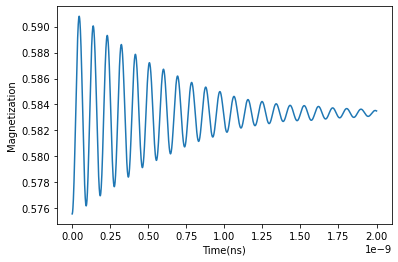

In [15]:
plt.plot(data[:,0],data[:,2],)
plt.ylabel("Magnetization")
plt.xlabel('Time(ns)')
plt.show()

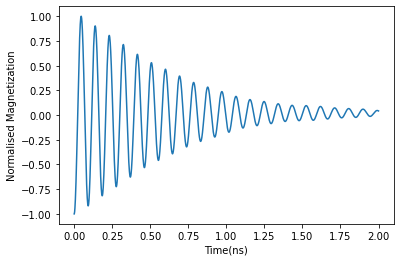

In [16]:
data=normalize(data)
plt.plot(data[:,0],data[:,2],)
plt.ylabel("Normalised Magnetization")
plt.xlabel('Time(ns)')
plt.show()

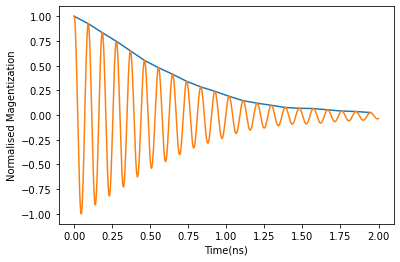

In [17]:
peaks=findpeak(data,1)
plt.plot(peaks[:,0],peaks[:,1])
plt.plot(data[:,0],data[:,1])
plt.ylabel("Normalised Magentization")
plt.xlabel('Time(ns)')
plt.show()



In [18]:
np.shape(peaks)

(22, 2)

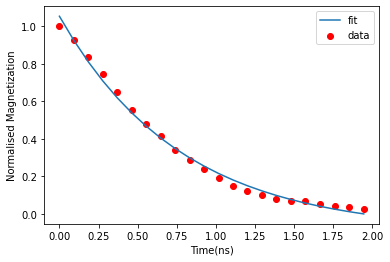

In [19]:
popt, pcov = curve_fit(func, peaks[:,0], peaks[:,1])


plt.scatter(peaks[:,0],peaks[:,1],label='data',color='r')
plt.plot(peaks[:,0],func(peaks[:,0], *popt),label='fit')
plt.legend(loc='best')
plt.ylabel("Normalised Magnetization")
plt.xlabel('Time(ns)')
plt.show()

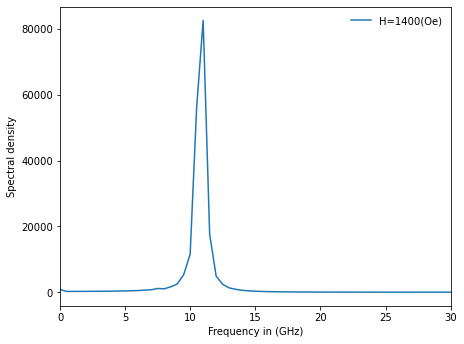

In [25]:
timesteps = get_timesteps(data)
dt = get_dt(data)

# Read average and spatially resolved magnetisation (y-component).
m_avg = get_mag(data,3)

# Compute frequencies and power spectrum via the two different methods.
freqs = get_fft_frequencies(timesteps)
spectrum_1 = get_spectrum_via_method_1(m_avg)
# Plot both power spectra into the same figure
fig = plt.figure(figsize=(7, 5.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(freqs, spectrum_1, label='H=1400(Oe)')
ax.set_xlabel('Frequency in (GHz)')
ax.set_ylabel('Spectral density')
#ax.set_yscale('log')
ax.set_xlim([0, 30])
ax.legend(frameon=False)

In [22]:
np.argmax(spectrum_1)

22

In [23]:
freqs[22]

10.98901098901099

In [ ]:
data2 = removedecay(data)
plt.plot(data2[:,0],data2[:,1])

In [ ]:
timesteps = get_timesteps(data)
dt = get_dt(data2)

# Read average and spatially resolved magnetisation (y-component).
m_avg = get_mag(data2,1)

# Compute frequencies and power spectrum via the two different methods.
freqs = get_fft_frequencies(timesteps)
spectrum_1 = get_spectrum_via_method_1(m_avg)
# Plot both power spectra into the same figure
fig = plt.figure(figsize=(7, 5.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(freqs, spectrum_1, label='Method 1')
ax.set_xlabel('Frequency ')
ax.set_ylabel('Spectral density')
#ax.set_yscale('log')
ax.set_xlim([0, 500])
ax.legend(frameon=False)